In [1]:
import numpy as np
import matplotlib.pyplot as plt


import math
import csv
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go

import matplotlib as mpl
import seaborn as sns
from matplotlib import gridspec

#matplotlib.verbose.level = 'debug-annoying'
mpl.rcParams.update({'font.size': 16})
import sys
import os

sns.set_theme()
palette = sns.color_palette('colorblind')
sns.set_context("paper")

sns.set(font_scale=1.5, rc={'text.usetex' : True})
sns.set_style("darkgrid", {"axes.facecolor": ".9"})

In [2]:
corrected = pd.read_table("./data_alex/phi_ew_corrected.txt", skiprows=0, delimiter="\t", names=["File", "Position", "Phi_ew", "Phi_ew_err", "Std", "Std_err"])
uncorrected = pd.read_table("./data_alex/phi_ew_old.txt", skiprows=0, delimiter="\t", names=["File", "Position", "Phi_ew", "Phi_ew_err", "Std", "Std_err"])

In [3]:
corrected

,File,Position,Phi_ew,Phi_ew_err,Std,Std_err
0,1000,R0,-35.250,0.9293,56.34,1.253
1,1222,L0,130.500,0.7174,47.83,0.733
2,1000,R1,-71.250,2.3850,51.54,3.470
3,1222,L1,156.800,1.9240,44.76,1.831
4,1333,C1,-143.600,1.7650,38.70,1.776
5,1000,R2,-2.782,1.8230,41.11,2.213
6,1222,L2,105.800,1.7010,45.47,1.632
7,1333,C2,51.940,1.5820,42.07,1.679


In [4]:
'''C2: +45, 
L0: +135, 
C1: -135, 
R0: -45.  
R2: -5, 
R1_ -85,
L2: +95, 
L1: +175.'''

'C2: +45, \nL0: +135, \nC1: -135, \nR0: -45.  \nR2: -5, \nR1_ -85,\nL2: +95, \nL1: +175.'

In [5]:
alphas_val = [-45, 135, -85, 175, -135, -5, 95, 45]

alphas = pd.DataFrame(data=corrected["Position"], columns=["Position"])
alphas["alpha"] = alphas_val

In [6]:
blue = "#5C8EBC"
orange = "#EC9072"

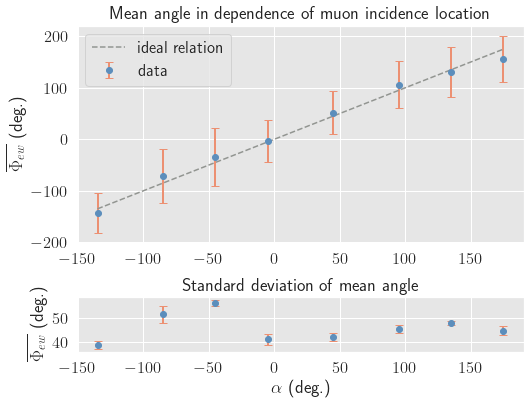

In [7]:
fig = plt.figure(figsize=(8,6))
gs = gridspec.GridSpec(2,1, height_ratios=[4, 1])
gs.update(hspace=0.4)

fig.add_subplot(gs[0])
plt.plot([-135, 175] , [-135, 175], linestyle="dashed", color="xkcd:grey", label="ideal relation")
plt.errorbar(alphas["alpha"], corrected["Phi_ew"], yerr=corrected["Std"], linestyle='None', \
             elinewidth=2, marker="o", color=orange, mfc=blue, mec=blue, capsize=4, label="data")
#plt.scatter(alphas["alpha"], corrected["Phi_ew"], marker="o", color=blue)
plt.title(r"Mean angle in dependence of muon incidence location")
plt.ylabel(r"$\overline{\Phi_{ew}}$ (deg.)")
#plt.axis("equal")

plt.legend()
#plt.xlabel(r"$\alpha$ (deg.)")
fig.add_subplot(gs[1])
plt.errorbar(alphas["alpha"], corrected["Std"], yerr=corrected["Std_err"], linestyle='None', \
             elinewidth=2, marker="o", color=orange, mfc=blue, mec=blue, capsize=4)
#plt.scatter(alphas["alpha"], corrected["Phi_ew"], marker="o", color=blue)
plt.title(r"Standard deviation of mean angle")
plt.ylabel(r"$\overline{\Phi_{ew}}$ (deg.)")
plt.xlabel(r"$\alpha$ (deg.)")
fig.savefig("phi_ew_alpha.pdf", dpi=72, bbox_inches="tight")

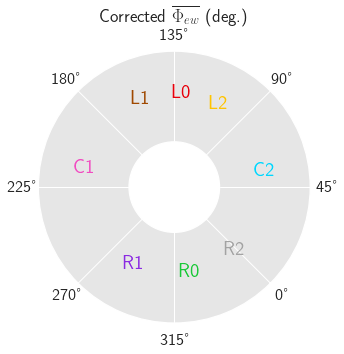

In [8]:
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(111, projection='polar')
ax.set_rorigin(-0.5)
ax.set_rticks([])
ax.set_theta_offset(-np.pi/4)
colors = sns.color_palette("bright")
ax.set_title(r"Corrected $\overline{\Phi_{ew}}$ (deg.)")
for i in range(len(corrected)):
    ax.text(np.deg2rad(corrected["Phi_ew"][i]), 1/2, corrected["Position"][i], fontsize=20, color=colors[i+2], horizontalalignment='center')

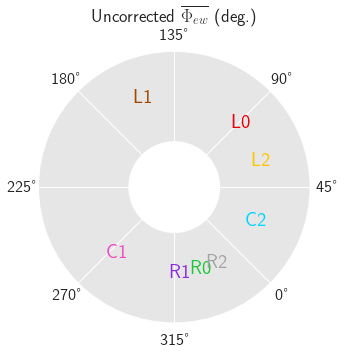

In [9]:
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(111, projection='polar')
ax.set_rorigin(-0.5)
ax.set_rticks([])
ax.set_theta_offset(-np.pi/4)
colors = sns.color_palette("bright")
ax.set_title(r"Uncorrected $\overline{\Phi_{ew}}$ (deg.)")
for i in range(len(uncorrected)):
    ax.text(np.deg2rad(uncorrected["Phi_ew"][i]), 1/2, uncorrected["Position"][i], fontsize=20, color=colors[i+2], horizontalalignment='center')

In [13]:
from scipy.optimize import curve_fit

def linear(x, a, b):
    return a*x + b

In [17]:
mean_std = np.mean(corrected["Std"])

popt, pcov = curve_fit(linear, alphas["alpha"], corrected["Phi_ew"], sigma=corrected["Phi_ew_err"])

print(popt)
print(pcov)

[0.95213039 3.32831561]
[[ 9.39157420e-04 -4.74940699e-02]
 [-4.74940699e-02  1.09101613e+01]]


96.57815861002267


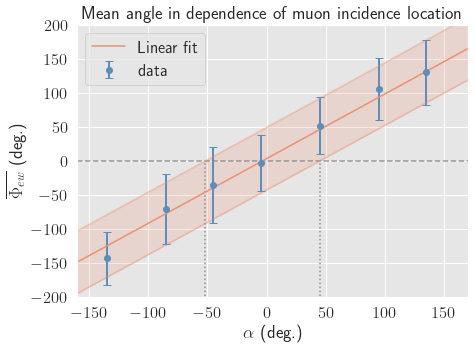

In [55]:
fig = plt.figure(figsize=(7,5))
#gs = gridspec.GridSpec(2,1, height_ratios=[4, 1])
#gs.update(hspace=0.4)

alphas_fine= np.arange(-160, 180, 0.1)
y_vals = linear(alphas_fine, popt[0], popt[1])
y_vals_low = y_vals - mean_std
y_vals_high = y_vals + mean_std

x_low = -(popt[1] - mean_std)/popt[0]
x_high = -(popt[1] + mean_std)/popt[0]

#fig.add_subplot(gs[0])
plt.fill_between(alphas_fine, y_vals_low, y_vals_high, color=orange, alpha=0.2)
plt.plot(alphas_fine, y_vals, linestyle="solid", color=orange, label="Linear fit")
plt.plot(alphas_fine, y_vals_low, linestyle="solid", color=orange, alpha=0.4)
plt.plot(alphas_fine, y_vals_high, linestyle="solid", color=orange, alpha=0.4)
#plt.plot([-135, 175] , [-135, 175], linestyle="dashed", color="xkcd:grey", label="ideal relation")

plt.errorbar(alphas["alpha"], corrected["Phi_ew"], yerr=corrected["Std"], linestyle='None', \
             elinewidth=2, marker="o", color=blue, mfc=blue, mec=blue, capsize=4, label="data")

#plt.scatter(alphas["alpha"], corrected["Phi_ew"], marker="o", color=blue)

plt.hlines(0, -160, 170, linestyle="dashed", color="grey", alpha=0.8)
plt.vlines(x_low, -210, 0, linestyle="dotted", color="grey", alpha=0.9)
plt.vlines(x_high, -210, 0, linestyle="dotted", color="grey", alpha=0.9)

plt.title(r"Mean angle in dependence of muon incidence location")
plt.ylabel(r"$\overline{\Phi_{ew}}$ (deg.)")
plt.xlabel(r"$\alpha$ (deg.)")
#plt.axis("equal")
plt.xlim((-160, 170))
plt.ylim((-200, 200))
plt.legend()

plt.savefig("confidence_phi.pdf", dpi=72, bbox_inches="tight")
print(abs(x_low - x_high))